In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv("all_text.csv")

In [3]:
df.columns

Index(['id', 'from', 'to', 'text', 'text to check', 'where', 'number', 'nouns',
       'determiners', 'conjuctions', 'adjectives', 'prepositions', 'pronouns',
       'verbs', 'adverbs', 'undefined', 'time', 'episode'],
      dtype='object')

In [7]:
df["from"].nunique()

267

In [31]:
len(df[df["from"].str.find("THREEPIO") !=-1])

319

In [33]:
len(df[df["from"]=="THREEPIO"])

318

## Data prep

We need to clean the text data in the title so that we can do some proper text mining. This includes

- Standardising
- Tokenising and removing stop words
- Lemmatising

In [36]:
df_filtered = df[df["from"].str.find("THREEPIO") !=-1].reset_index(drop=True)

### Standardising

In [58]:
# make text lower case
text = df_filtered["text"].str.lower()

# replace values within titles

# function to loop through the column and replace substrings
def replace_values(text, dic):
    for x, y in dic.items():
        text = text.str.replace(x, y, regex=True)
    return text

# list of values to be replaced, including punctuation
replace_dict = {"&amp;": " ", #xml syntax for &
                "\n":" ",
                "[!\"#$%&()*+,./:;<=>?@[\]^_`{|}~“”-]": " ",
                "  ": " ", #double space
                "’s" :"",  
                "’m" : "",
              #  "y'all": "you all",
              #  "i'm": "i am",
              #  "i've": "i have",
              #  "it'll": "it will",
              #  "we're": "we are",
              #  "i'd": "i would",
             #   "might":"",
                "see threepio": "c3po",
                "c 3po": "c3po",
                "artoo":"r2",
                "r2 d2": "r2d2"
               }
                
# apply function
text = replace_values(text, replace_dict)

# strip white space at the end
text = text.str.strip()

# add new column to dataframe
df_filtered["text_standardised"] = text

print(text)

0      how do you do i am c3po human cyborg relations...
1             i'm not sure this floor is entirely stable
2          hello i don't believe we have been introduced
3      r2d2 a pleasure to meet you i am c3po human cy...
4          i beg your pardon but what do you mean  naked
                             ...                        
314                                          oh r2 hurry
315       my goodness r2 why did you have to be so brave
316                   oh princess leia are you all right
317                                              oh dear
318                                          they did it
Name: text, Length: 319, dtype: object


### Remove stop words

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lisa.hornung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
# create empty list to store text without stop words
text_no_stop_words = []

# iterate through each word in each text row and append those that are no stop words
# split titles into substrings using space as delimiter
for words in text.str.split(" "):
    x = []
    try:
        for word in words:
            if word not in stop_words:
                x.append(word)
    
    #exception for missing data
    except TypeError:
        x.append(" ")
    text_no_stop_words.append(x)

# join titles back together
text_no_stop_words = [" ".join(items) for items in text_no_stop_words]

# add title to dataframe
df_filtered["text_no_stop_words"] = text_no_stop_words

print(text_no_stop_words[:3])

['c3po human cyborg relations might serve', "i'm sure floor entirely stable", 'hello believe introduced']


### Lemmatize

In [60]:
import en_core_web_sm

# load model from SpaCy
nlp = en_core_web_sm.load()

# create new list to store lemmatised titles
text_lemmatised = []

# iterate through each word in each title and append the lemmatised version of the word
for words in pd.Series(text_no_stop_words):
    x = []
    for word in nlp(words):
        x.append(word.lemma_)
    text_lemmatised.append(x)

# join titles back together
text_lemmatised = [" ".join(items) for items in text_lemmatised]

df_filtered["text_lemmatised"] = text_lemmatised

## Analyse

In [125]:
from nltk import bigrams
import itertools
import collections

In [120]:
text_no_stop_words_split = [i.split() for i in text_no_stop_words]

In [126]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(words)) for words in text_no_stop_words_split]

# View bigrams for the first tweet
terms_bigram

[[('c3po', 'human'),
  ('human', 'cyborg'),
  ('cyborg', 'relations'),
  ('relations', 'might'),
  ('might', 'serve')],
 [("i'm", 'sure'),
  ('sure', 'floor'),
  ('floor', 'entirely'),
  ('entirely', 'stable')],
 [('hello', 'believe'), ('believe', 'introduced')],
 [('r2d2', 'pleasure'),
  ('pleasure', 'meet'),
  ('meet', 'c3po'),
  ('c3po', 'human'),
  ('human', 'cyborg'),
  ('cyborg', 'relations')],
 [('beg', 'pardon'), ('pardon', 'mean'), ('mean', 'naked')],
 [('parts', 'showing'), ('showing', 'oh'), ('oh', 'goodness')],
 [('know', 'find'),
  ('find', 'jar'),
  ('jar', 'jar'),
  ('jar', 'creature'),
  ('creature', 'little'),
  ('little', 'odd')],
 [('quite', 'right'), ('right', "he's"), ("he's", 'odd'), ('odd', 'indeed')],
 [('oh', 'space'),
  ('space', 'travel'),
  ('travel', 'sounds'),
  ('sounds', 'rather'),
  ('rather', 'perilous')],
 [('assure', 'never'),
  ('never', 'get'),
  ('get', 'onto'),
  ('onto', 'one'),
  ('one', 'dreadful'),
  ('dreadful', 'starships')],
 [('mister', '

In [127]:
# Flatten list of bigrams in clean tweets
bigrams_flat = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams_flat)

bigram_counts.most_common(20)

[(('master', 'luke'), 21),
 (('oh', 'dear'), 9),
 (('oh', 'oh'), 8),
 (("i'm", 'afraid'), 7),
 (('princess', 'leia'), 7),
 (('r2', 'r2'), 6),
 (('come', 'back'), 6),
 (('c3po', 'human'), 5),
 (('wait', 'wait'), 5),
 (('human', 'cyborg'), 4),
 (('cyborg', 'relations'), 4),
 (("i'm", 'sure'), 4),
 (("we're", 'doomed'), 4),
 (('excuse', 'sir'), 4),
 (('r2', 'unit'), 4),
 (('oh', 'r2'), 4),
 (('sir', 'might'), 4),
 (('captain', 'solo'), 4),
 (("i'm", 'terribly'), 4),
 (('jabba', 'hutt'), 4)]

In [139]:
import numpy as np

In [153]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25),
                             columns=['bigram', 'count'])

#bigram_df = bigram_df[bigram_df["bigram"] = ('master', 'luke')]

new_bigram = []
new_count = []
for bigram, i in bigram_df["bigram"]:
    print(bigram[0])
    if bigram[0] != bigram[1]:
        new_bigram.append(bigram)
        new_count.append(bigram_df["count"])

new_df["bigram"] = new_bigram
new_df["count"] = new_count
#bigram_df["bigram"][0][0]

master
oh
oh
i'm
princess
r2
come
c3po
wait
human
cyborg
i'm
we're
excuse
r2
oh
sir
captain
i'm
jabba
beg
quite
i'm
going
i'm


### Graph

In [83]:
import networkx as nx

In [95]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [96]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=300)

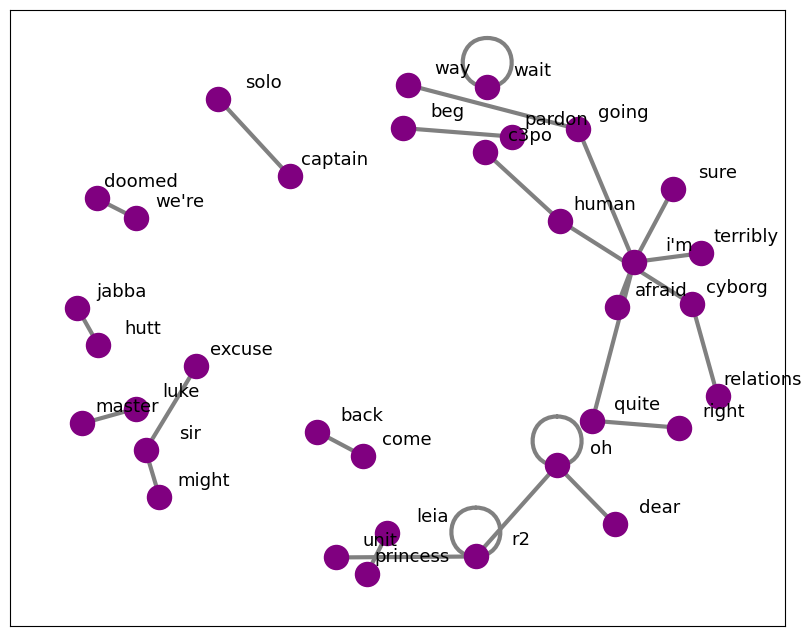

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Data viz

In [10]:
df["from"].unique()

array(['QUI-GON', 'CAPTAIN', 'NUTE', 'TC-14', 'OBI-WAN', 'DOFINE',
       'DARTH SIDIOUS', 'PILOT', 'TC14', 'OWO-1', 'CAPORAL', 'TEY HOW',
       'RUNE', 'AMIDALA', 'PALPATINE', 'CAPT. PANAKA', 'BIBBLE', 'OOM-9',
       'JAR JAR', 'CAPT. TARPALS', 'BOSS NASS', 'PADME', 'GUARD DROID',
       'QUI-GON GUARD DROID', 'RIC OLIE', 'ARTOO', 'WATTO', 'ANAKIN',
       'VENDOR', 'SEBULBA', 'CONTROLER', 'ANAKAIN', 'JIRA', 'THREEPIO',
       'DARTH MAUL', 'SHMI', 'KITSTER', 'WALD', 'AMEE', 'SEEK',
       'SPEAKER A', 'SPEAKER B', 'JABBA', 'ODY', 'VALORUM', 'KI-ADI',
       'MACE WINDU', 'YODA', 'GUARD', 'RABE', 'c', 'LOTT DOD', 'AKS MOE',
       'MAS AMEDDA', 'GUNGAN LOOKOUT', 'GENERAL CEEL', 'SABE',
       'BRAVO TWO', 'BRAVO THREE', 'CAPTAIN TYPHO', 'CORDÉ',
       'SENATOR ASK AAK', 'AMBASSADOR DARSANA', 'ORN FREE TAA', 'DAR WAC',
       'KI-ADI-MUNDI', 'BAIL ORGANA', 'ELAN SLEAZEBAGGANO', 'ZAM WESSEL',
       'DORME', 'PK-4', 'SERVER', 'FOOD SERVER', 'HERMIONE BAGWA',
       'DEXTER JETTSTER',